In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
cov_nercome = np.loadtxt("../output/Patchy_V6C_BOSS_DR12_NGC_z1_cov_nercome.matrix")
cov_sample = np.loadtxt("../output/Patchy_V6C_BOSS_DR12_NGC_z1_cov_sample.matrix")

# 'Real' covariance matrix before processing.
# The term 'real' here indicates that this is the matrix that we use to compare
# our estimates to.
cov_real_preproc = np.loadtxt("../data/C_2048_BOSS_DR12_NGC_z1_V6C_1_1_1_1_1_10_200_200_prerecon.matrix")

In [20]:
print(cov_nercome)

[[ 2.37323130e+08  1.86024630e+07  9.93829745e+04 ...  9.20947171e+03
  -1.24516461e+04  2.24203892e+04]
 [ 1.86024630e+07  5.16992164e+07  4.74738440e+06 ...  9.42837843e+03
   9.52712278e+03 -1.41014722e+04]
 [ 9.93829745e+04  4.74738440e+06  1.69697364e+07 ... -4.73772115e+02
  -2.34027554e+03  6.80012721e+03]
 ...
 [ 9.20947171e+03  9.42837843e+03 -4.73772115e+02 ...  4.70457537e+03
   1.36829796e+03  4.09849815e+02]
 [-1.24516461e+04  9.52712278e+03 -2.34027554e+03 ...  1.36829796e+03
   4.35627101e+03  1.08072377e+03]
 [ 2.24203892e+04 -1.41014722e+04  6.80012721e+03 ...  4.09849815e+02
   1.08072377e+03  4.07136743e+03]]


In [21]:
indices = np.concatenate((np.arange(40), np.arange(40)+80, np.arange(40)+160))
cov_real = (cov_real_preproc[indices, :])[:, indices]

In [22]:
print(cov_real)

[[ 2.39531896e+08  1.91051563e+07  1.44038639e+05 ...  9.68083967e+03
  -1.21684291e+04  2.21567909e+04]
 [ 1.91051563e+07  5.15256710e+07  4.78376836e+06 ...  9.13608077e+03
   9.26311893e+03 -1.41639754e+04]
 [ 1.44038639e+05  4.78376836e+06  1.67772970e+07 ... -5.49127765e+02
  -2.28200815e+03  6.76773412e+03]
 ...
 [ 9.68083967e+03  9.13608077e+03 -5.49127765e+02 ...  4.22979902e+03
   1.28931823e+03  3.78440184e+02]
 [-1.21684291e+04  9.26311893e+03 -2.28200815e+03 ...  1.28931823e+03
   3.88691287e+03  1.00320951e+03]
 [ 2.21567909e+04 -1.41639754e+04  6.76773412e+03 ...  3.78440184e+02
   1.00320951e+03  3.62984716e+03]]


In [39]:
evals_nercome = np.linalg.eigvalsh(cov_nercome)
evals_sample = np.linalg.eigvalsh(cov_sample)
evals_real = np.linalg.eigvalsh(cov_real)

Text(0, 0.5, 'Eigenvalues')

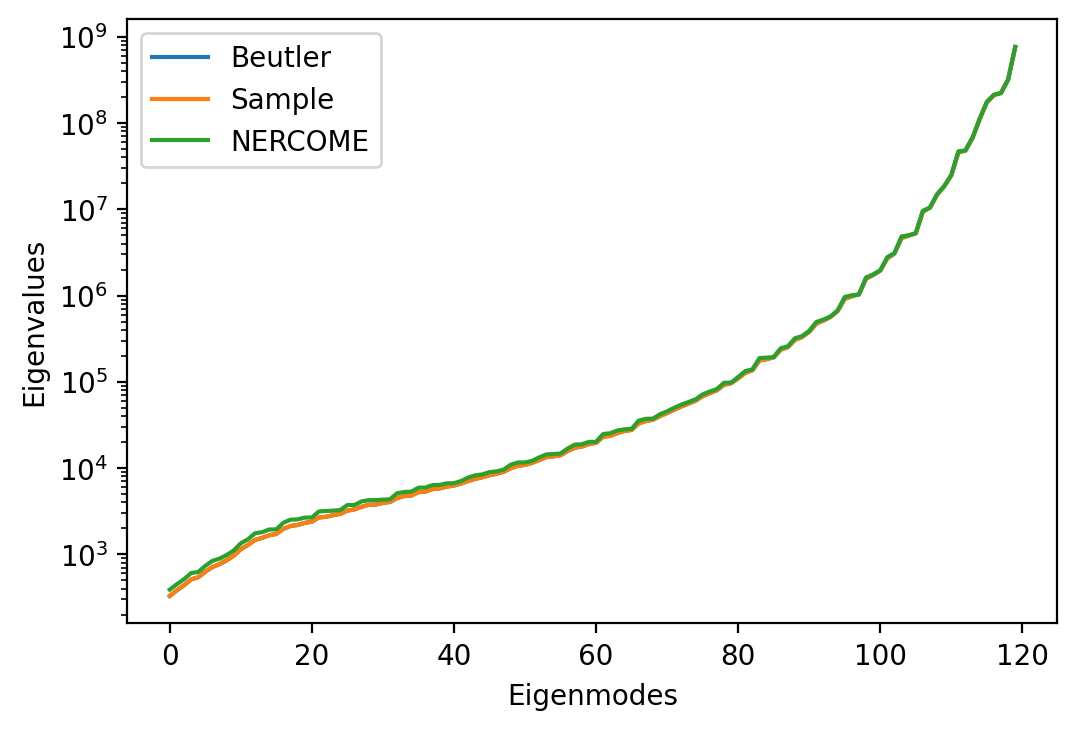

In [40]:
plt.figure(dpi=200)
plt.plot(evals_real, label="Beutler")
plt.plot(evals_sample, label="Sample")
plt.plot(evals_nercome, label="NERCOME")
plt.yscale("log")
plt.legend()
plt.xlabel("Eigenmodes")
plt.ylabel("Eigenvalues")